# Money plot for different values of $c_t$

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

/var/folders/d0/vjgg68h93_q2fcyzx7cftx_h0000gn/T/ipykernel_82934/2583244540.py:106: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0,350000)


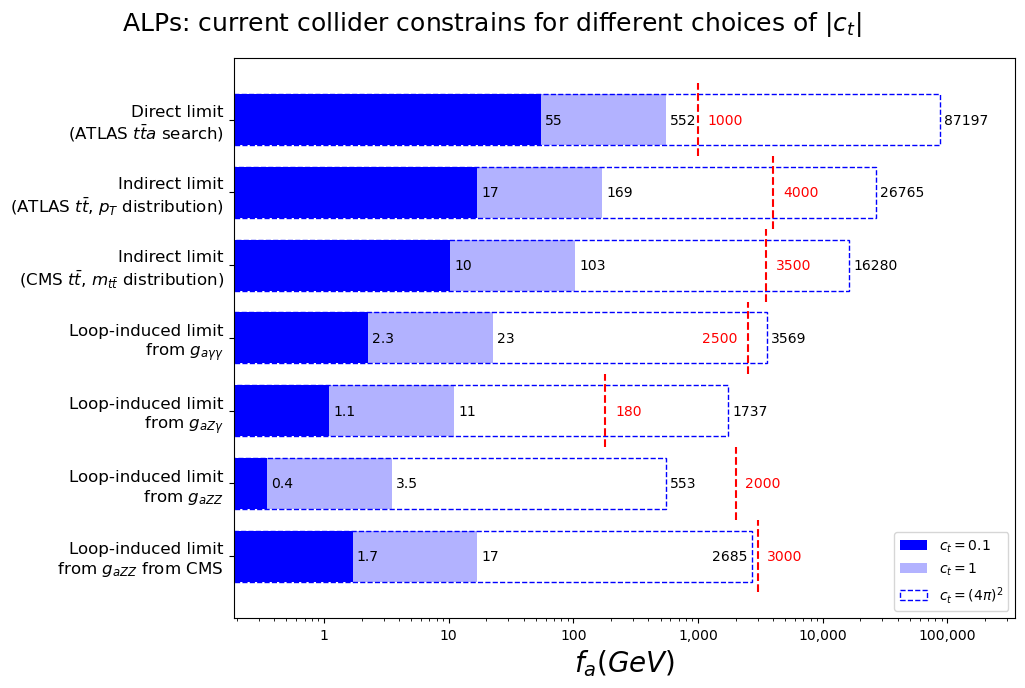

In [22]:
fig, ax = plt.subplots(figsize=(10,7), facecolor=(1, 1, 1))
# can choose among viridis, plasma, inferno, magma, and cividis
mpl.pyplot.plasma()

x_axis = ['Loop-induced limit\n from $g_{aZZ}$ from CMS',
          'Loop-induced limit\n from $g_{aZZ}$',
          'Loop-induced limit\n from $g_{aZ\gamma}$',
          'Loop-induced limit\n from $g_{a\gamma\gamma}$',
          'Indirect limit\n'+r'(CMS $t\bar{t}$, $m_{t\bar{t}}$ distribution)',
          'Indirect limit\n'+r'(ATLAS $t\bar{t}$, $p_T$ distribution)',
          'Direct limit\n'+r'(ATLAS $t\bar{t}a$ search)']

y_axis = np.array([17, 3.5,11.0,22.6,1000/9.7,1000/5.9,1000/1.811])
y_axis_01 = 0.1*y_axis
y_axis_4pi = (4*np.pi)**2*y_axis
#bar = ax.barh(x_axis, y_axis)
ax.barh(x_axis,height=0.7, width=y_axis_4pi, facecolor=(1,1,1,0), edgecolor = 'blue', linestyle='--',log='True', label = r"$c_t = (4\pi)^2$")
ax.barh(x_axis,height=0.7, width=y_axis, facecolor='blue', alpha=0.3, log='True', label = r"$c_t = 1$")
ax.barh(x_axis,height=0.7,  width=y_axis_01, facecolor='blue', alpha=1, log='True', label = r"$c_t = 0.1$")

# add EFT validity limits
eft_values = (3000, 2000,180,2500,3500,4000,1000)
eft_range = np.arange(7)

plt.vlines(3000, ymin=-0.5,ymax=0.5,colors='r', linestyle='dashed')
plt.vlines(2000, ymin=0.5,ymax=1.5,colors='r', linestyle='dashed')
plt.vlines(180, ymin=1.5,ymax=2.5,colors='r', linestyle='dashed')
plt.vlines(2500, ymin=2.5,ymax=3.5,colors='r', linestyle='dashed')
plt.vlines(3500, ymin=3.5,ymax=4.5,colors='r', linestyle='dashed')
plt.vlines(4000, ymin=4.5,ymax=5.5,colors='r', linestyle='dashed')
plt.vlines(1000, ymin=5.5,ymax=6.5,colors='r', linestyle='dashed')

for i in range(7):
    label = '{:.0f}'.format(eft_values[i])
    space= 7
    ha = 'left'
    
    if (i==3):
        space*=-1
        ha='right'
        
    if i==5:
        space*=1
        
    plt.annotate(
    label,                      # Use `label` as label
    (eft_values[i], eft_range[i]),         # Place label at bar end
    xytext=(space, 0),          # Horizontally shift label by `space`
    textcoords='offset points', # Interpret `xytext` as offset in points
    va='center',                # Vertically center label
    ha=ha,                      # Horizontally align label differently for positive and negative values
    color = 'red')            # Change label color to white
    

plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plot_title = 'ALPs: current collider constrains for different choices of $|c_t|$'
subtitle = 'Current constrains'
title_size = 18
label_size = 14
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.33, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

#ax.grid(zorder=0)

rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = 3
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if (x_value < 0 or x_value == 17*(4*np.pi)**2):
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    
    if x_value < 10:
        label = '{:.1f}'.format(x_value)
    else:
        label = '{:.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'black')            # Change label color to white
    
#Set x-label
ax.set_xlabel(r'$f_{a}(GeV)$', color='black', fontsize=20)
ax.set_xlim(0,350000)  

plt.yticks(fontsize=12)            

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('plots/money_plot_different_ct.pdf', bbox_inches="tight")